In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [3]:
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

In [7]:
def build_model(seed = 2024):

    tf.random.set_seed(seed)
    return tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])


def build_and_train_model(optimizer):

    model = build_model()
    model.compile(
        loss = 'sparse_categorical_crossentropy',
        optimizer = optimizer,
        metrics = ['accuracy']
    )

    return model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

# 1. SGD

In [8]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
history_sgd = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.3323 - accuracy: 0.5985 - val_loss: 0.8666 - val_accuracy: 0.7094
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7858 - accuracy: 0.7276 - val_loss: 0.6978 - val_accuracy: 0.7524
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6734 - accuracy: 0.7716 - val_loss: 0.6175 - val_accuracy: 0.7926
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6114 - accuracy: 0.7930 - val_loss: 0.5741 - val_accuracy: 0.8070
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5709 - accuracy: 0.8061 - val_loss: 0.5419 - val_accuracy: 0.8160
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5422 - accuracy: 0.8156 - val_loss: 0.5158 - val_accuracy: 0.8232
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5208 - accuracy: 0.8211 - val_loss: 0.4991 - val_accuracy:

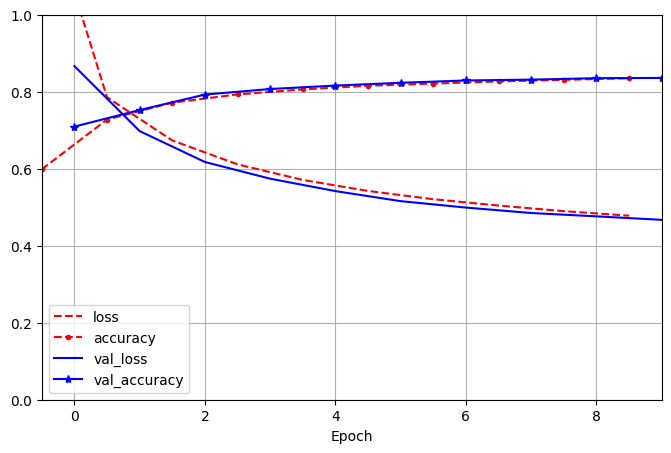

In [11]:
def plot_loss(history, num_epochs):
    plt.figure(figsize=(8, 5))
    for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
        epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
        plt.plot(epochs, history.history[key], style, label=key)
    plt.xlabel("Epoch")
    plt.axis([-0.5, num_epochs - 1, 0., 1])
    plt.legend(loc="lower left")
    plt.grid()
    plt.show()

plot_loss(history_sgd,10)

# 2. Momentum

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6926 - accuracy: 0.7624 - val_loss: 0.4904 - val_accuracy: 0.8322
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4715 - accuracy: 0.8349 - val_loss: 0.4312 - val_accuracy: 0.8434
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4257 - accuracy: 0.8506 - val_loss: 0.4360 - val_accuracy: 0.8424
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3976 - accuracy: 0.8581 - val_loss: 0.3960 - val_accuracy: 0.8600
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3759 - accuracy: 0.8667 - val_loss: 0.3948 - val_accuracy: 0.8576
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3610 - accuracy: 0.8707 - val_loss: 0.3639 - val_accuracy: 0.8694
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3490 - accuracy: 0.8750 - val_loss: 0.3557 - val_accuracy:

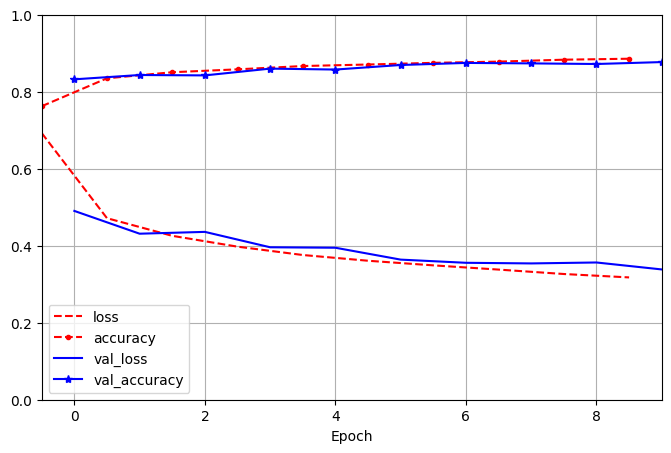

In [12]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
history_momentum = build_and_train_model(optimizer)

plot_loss(history_momentum,10)

# 3. Nesterov Accelerated Gradient

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6802 - accuracy: 0.7677 - val_loss: 0.4734 - val_accuracy: 0.8356
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4591 - accuracy: 0.8402 - val_loss: 0.4258 - val_accuracy: 0.8478
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4173 - accuracy: 0.8534 - val_loss: 0.4077 - val_accuracy: 0.8536
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3915 - accuracy: 0.8612 - val_loss: 0.3933 - val_accuracy: 0.8628
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3721 - accuracy: 0.8685 - val_loss: 0.3959 - val_accuracy: 0.8550
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3568 - accuracy: 0.8722 - val_loss: 0.3741 - val_accuracy: 0.8696
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3447 - accuracy: 0.8777 - val_loss: 0.3568 - val_accuracy:

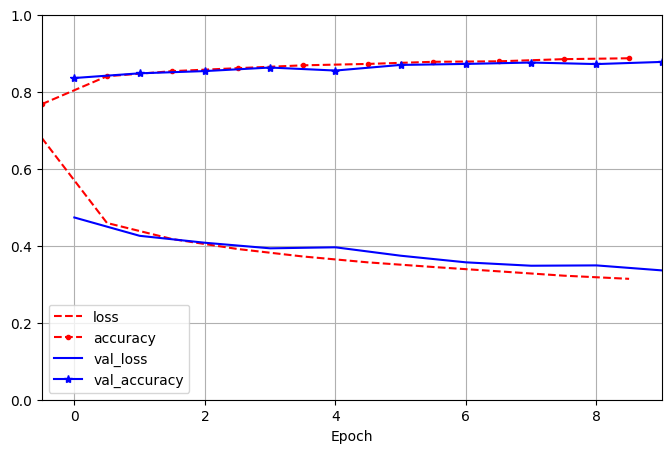

In [13]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
history_nesterov = build_and_train_model(optimizer)

plot_loss(history_nesterov,10)

# 4. AdaGrad

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.0012 - accuracy: 0.6921 - val_loss: 0.6698 - val_accuracy: 0.7784
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6298 - accuracy: 0.7914 - val_loss: 0.5756 - val_accuracy: 0.7982
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5639 - accuracy: 0.8106 - val_loss: 0.5304 - val_accuracy: 0.8154
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5296 - accuracy: 0.8202 - val_loss: 0.5072 - val_accuracy: 0.8228
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5068 - accuracy: 0.8275 - val_loss: 0.4896 - val_accuracy: 0.8276
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4905 - accuracy: 0.8321 - val_loss: 0.4738 - val_accuracy: 0.8314
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4778 - accuracy: 0.8366 - val_loss: 0.4662 - val_accuracy:

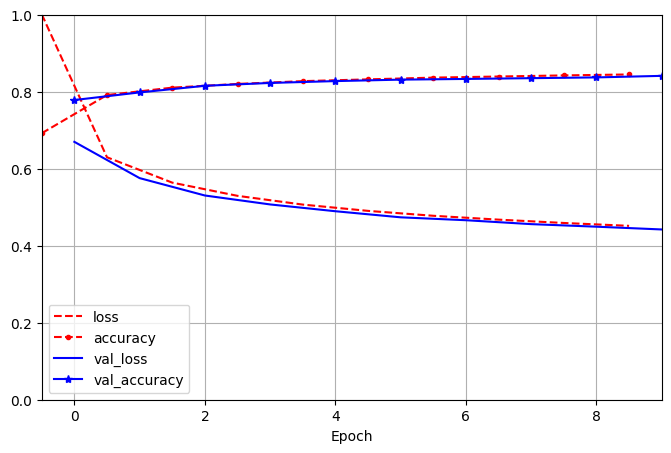

In [14]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)
history_adagrad = build_and_train_model(optimizer)

plot_loss(history_adagrad,10)

# 5. RMSProp

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6853 - accuracy: 0.7695 - val_loss: 0.4824 - val_accuracy: 0.8304
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4493 - accuracy: 0.8427 - val_loss: 0.4481 - val_accuracy: 0.8308
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4054 - accuracy: 0.8577 - val_loss: 0.3901 - val_accuracy: 0.8596
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3794 - accuracy: 0.8662 - val_loss: 0.3832 - val_accuracy: 0.8626
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3612 - accuracy: 0.8716 - val_loss: 0.3818 - val_accuracy: 0.8576
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3463 - accuracy: 0.8772 - val_loss: 0.3767 - val_accuracy: 0.8682
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3347 - accuracy: 0.8814 - val_loss: 0.3521 - val_accuracy:

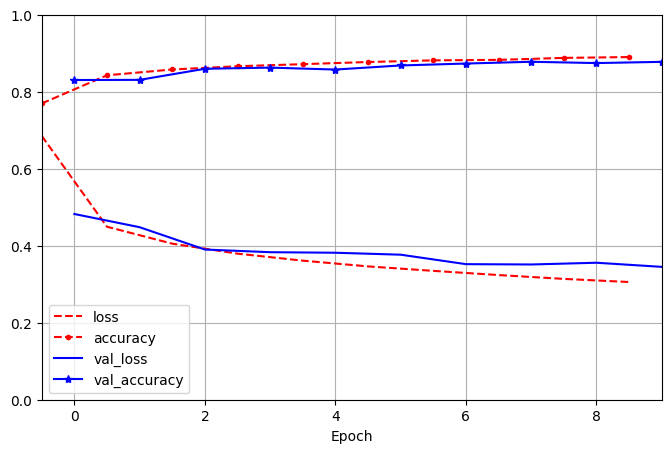

In [16]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001, rho=0.9)

history_rmsprop = build_and_train_model(optimizer)

plot_loss(history_rmsprop,10)

# 6. Adam Optimization

Epoch 1/10
1719/1719 [==============================] - 5s 2ms/step - loss: 0.5024 - accuracy: 0.8194 - val_loss: 0.3845 - val_accuracy: 0.8632
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3778 - accuracy: 0.8625 - val_loss: 0.3795 - val_accuracy: 0.8608
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3418 - accuracy: 0.8738 - val_loss: 0.3990 - val_accuracy: 0.8510
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3179 - accuracy: 0.8818 - val_loss: 0.3588 - val_accuracy: 0.8734
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2976 - accuracy: 0.8884 - val_loss: 0.3589 - val_accuracy: 0.8760
Epoch 6/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2842 - accuracy: 0.8938 - val_loss: 0.3462 - val_accuracy: 0.8772
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2703 - accuracy: 0.8988 - val_loss: 0.3392 - val_accuracy:

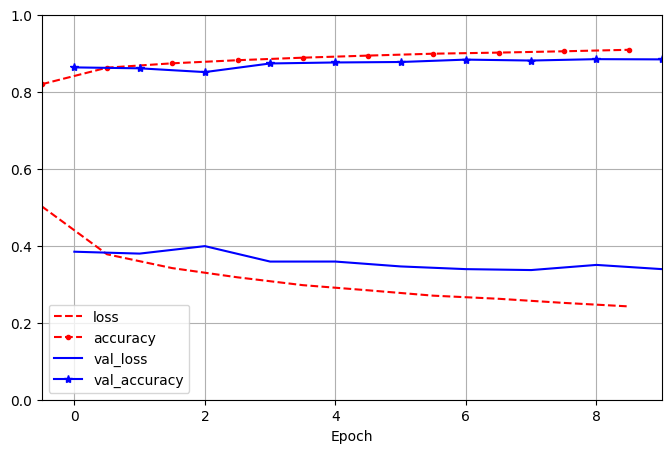

In [17]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
                                     beta_2=0.999)

history_adam = build_and_train_model(optimizer)

plot_loss(history_adam,10)

# 7. Adamax Optimization

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5450 - accuracy: 0.8097 - val_loss: 0.4179 - val_accuracy: 0.8494
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4005 - accuracy: 0.8582 - val_loss: 0.3734 - val_accuracy: 0.8620
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3620 - accuracy: 0.8693 - val_loss: 0.4105 - val_accuracy: 0.8450
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3352 - accuracy: 0.8777 - val_loss: 0.3540 - val_accuracy: 0.8758
Epoch 5/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3148 - accuracy: 0.8848 - val_loss: 0.3531 - val_accuracy: 0.8742
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3016 - accuracy: 0.8887 - val_loss: 0.3278 - val_accuracy: 0.8810
Epoch 7/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2879 - accuracy: 0.8947 - val_loss: 0.3274 - val_accuracy:

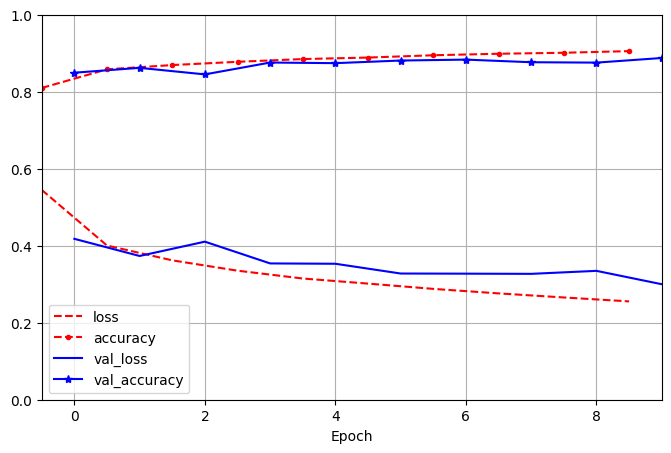

In [18]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9,
                                       beta_2=0.999)

history_adamax = build_and_train_model(optimizer)

plot_loss(history_adamax,10)

# 8. Nadam Optimization

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4826 - accuracy: 0.8293 - val_loss: 0.3862 - val_accuracy: 0.8610
Epoch 2/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3670 - accuracy: 0.8670 - val_loss: 0.3722 - val_accuracy: 0.8568
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3331 - accuracy: 0.8772 - val_loss: 0.3622 - val_accuracy: 0.8686
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3127 - accuracy: 0.8835 - val_loss: 0.3338 - val_accuracy: 0.8798
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2956 - accuracy: 0.8896 - val_loss: 0.3303 - val_accuracy: 0.8786
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2811 - accuracy: 0.8953 - val_loss: 0.3426 - val_accuracy: 0.8762
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2670 - accuracy: 0.8994 - val_loss: 0.3347 - val_accuracy:

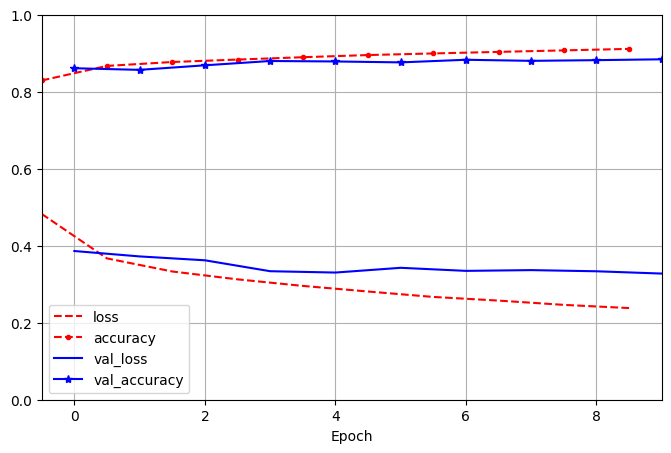

In [19]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

history_nadam = build_and_train_model(optimizer)

plot_loss(history_nadam,10)

# 9. AdamW Optimization

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4978 - accuracy: 0.8210 - val_loss: 0.4252 - val_accuracy: 0.8500
Epoch 2/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3742 - accuracy: 0.8631 - val_loss: 0.3687 - val_accuracy: 0.8700
Epoch 3/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3389 - accuracy: 0.8745 - val_loss: 0.3656 - val_accuracy: 0.8590
Epoch 4/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3158 - accuracy: 0.8820 - val_loss: 0.3853 - val_accuracy: 0.8644
Epoch 5/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2980 - accuracy: 0.8891 - val_loss: 0.3476 - val_accuracy: 0.8750
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2841 - accuracy: 0.8938 - val_loss: 0.3353 - val_accuracy: 0.8740
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2687 - accuracy: 0.8973 - val_loss: 0.3348 - val_accuracy:

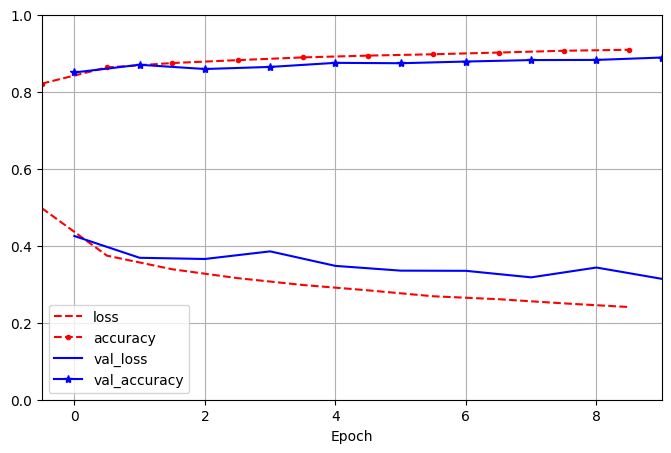

In [20]:
optimizer = tf.keras.optimizers.AdamW(weight_decay=1e-5, learning_rate=0.001, beta_1=0.9, beta_2=0.999)
history_adamw = build_and_train_model(optimizer)

plot_loss(history_adamw,10)

# Plot all losses in one graph

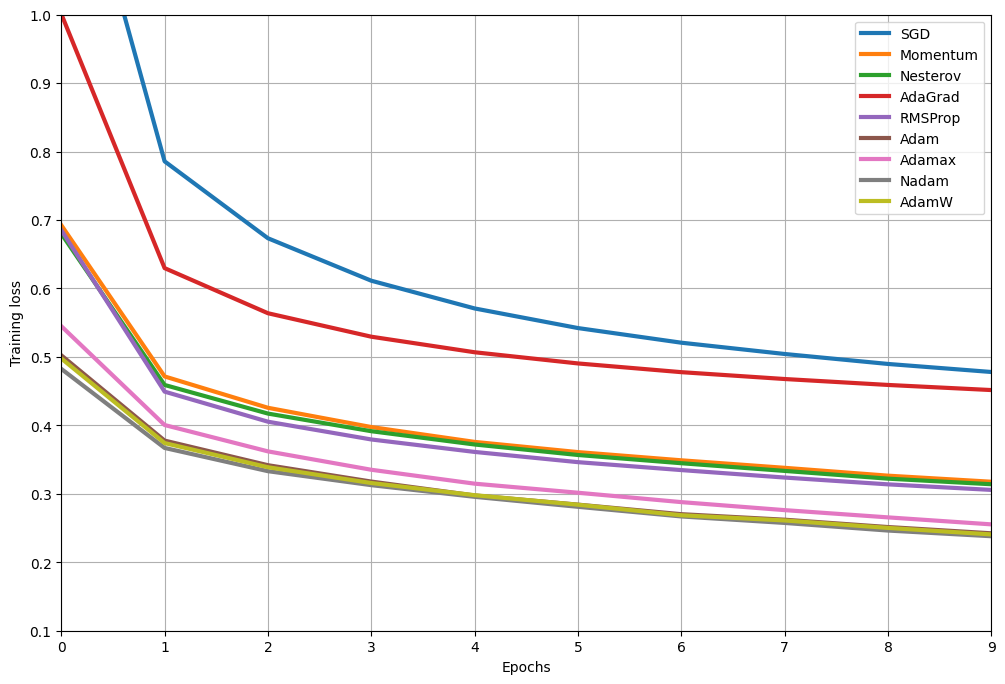

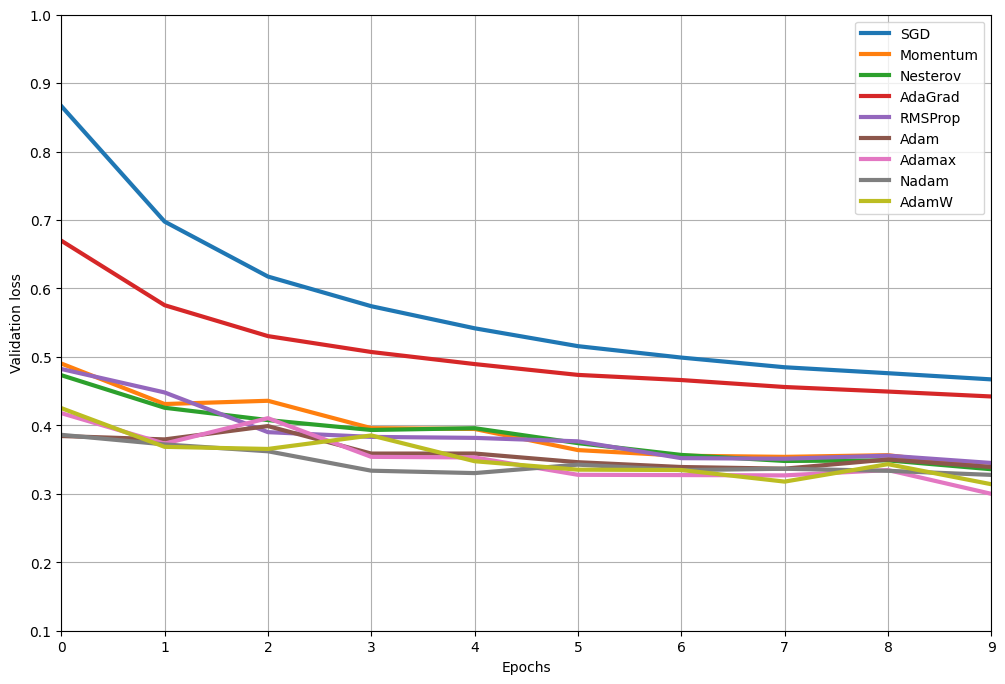

In [23]:
for loss in ("loss", "val_loss"):
    plt.figure(figsize=(12, 8))
    opt_names = "SGD Momentum Nesterov AdaGrad RMSProp Adam Adamax Nadam AdamW"
    for history, opt_name in zip((history_sgd, history_momentum, history_nesterov,
                                  history_adagrad, history_rmsprop, history_adam,
                                  history_adamax, history_nadam, history_adamw),
                                 opt_names.split()):
        plt.plot(history.history[loss], label=f"{opt_name}", linewidth=3)

    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel({"loss": "Training loss", "val_loss": "Validation loss"}[loss])
    plt.legend(loc="upper right")
    plt.axis([0, 9, 0.1, 1.0])
    plt.show()